In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
import glob
# path = '../../data/jpg/global_F814W_InvertY/'
path = '../../data/data_augmentation/images/'
files_name = glob.glob(os.path.join(path, "*"))

In [3]:
files_name

['../../data/data_augmentation/images\\hst_10190_12_acs_wfc_f814w_j90o12_drc_1.jpg',
 '../../data/data_augmentation/images\\hst_10190_12_acs_wfc_f814w_j90o12_drc_10.jpg',
 '../../data/data_augmentation/images\\hst_10190_12_acs_wfc_f814w_j90o12_drc_11.jpg',
 '../../data/data_augmentation/images\\hst_10190_12_acs_wfc_f814w_j90o12_drc_12.jpg',
 '../../data/data_augmentation/images\\hst_10190_12_acs_wfc_f814w_j90o12_drc_13.jpg',
 '../../data/data_augmentation/images\\hst_10190_12_acs_wfc_f814w_j90o12_drc_14.jpg',
 '../../data/data_augmentation/images\\hst_10190_12_acs_wfc_f814w_j90o12_drc_15.jpg',
 '../../data/data_augmentation/images\\hst_10190_12_acs_wfc_f814w_j90o12_drc_16.jpg',
 '../../data/data_augmentation/images\\hst_10190_12_acs_wfc_f814w_j90o12_drc_17.jpg',
 '../../data/data_augmentation/images\\hst_10190_12_acs_wfc_f814w_j90o12_drc_18.jpg',
 '../../data/data_augmentation/images\\hst_10190_12_acs_wfc_f814w_j90o12_drc_19.jpg',
 '../../data/data_augmentation/images\\hst_10190_12_acs

In [4]:
# revers origin image coordinate is important, make sure that the origin is at the bottom left corner same as the DS9 coordinate
# ref by https://stackoverflow.com/questions/43584463/change-origin-of-image-coordinate-system-to-bottom-left-instead-of-default-top-l

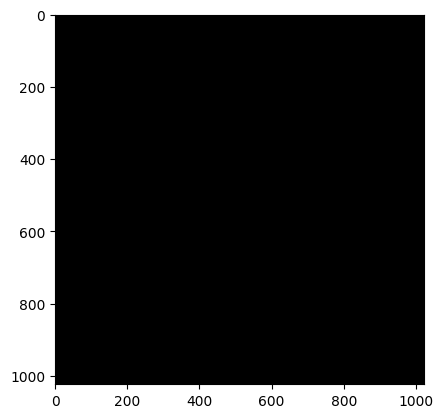

In [5]:
# reverse the origin of the y-axis of the image
def reverse_origin(image):
    plt.imshow(image, origin='lower')
    plt.show()
    

# display the image
def display_image(image):
    plt.imshow(image)
    plt.show()
image = plt.imread(files_name[0])
display_image((image))

In [6]:
# display image in file_
index = 0
img = plt.imread(files_name[index])


In [7]:
# read text in position file
# path_ = "../../data/jpg/labels_global_F814W_InvertY/"
path_ = "../../data/data_augmentation/x_y_coordinate/"
file_ = glob.glob(os.path.join(path_, "*"))
with open(file_[index], "r") as f:
    items_list = f.readlines()
    items_list = [item.strip().split(" ") for item in items_list]


In [8]:
len(items_list), items_list

(0, [])

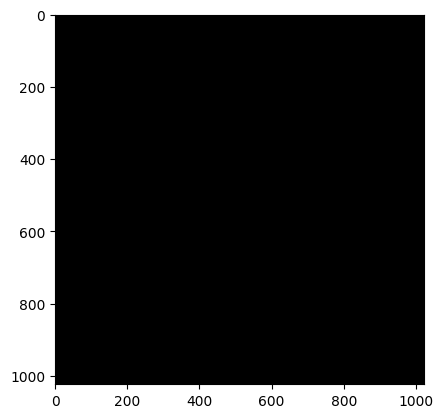

In [9]:
# plot scatter in image using position file by x_min = x-w, x_max = x+w, y_min = y-h, y_max = y+h
def plot_scatter(items_list, img):
    """
    items_list: list of items in position file
    img: image
    """
    for item in items_list:
        x = float(item[1])
        y = float(item[2])
        w = float(item[3])
        h = float(item[4])
        x_min = x - w
        x_max = x + w
        y_min = y - h
        y_max = y + h
        plt.scatter(x_min, y_min, c='r')
        plt.scatter(x_max, y_max, c='r')
        plt.scatter(x_min, y_max, c='r')
        plt.scatter(x_max, y_min, c='r')
        plt.scatter(x, y, c='b')
    plt.imshow(img)
    plt.show()

plot_scatter(items_list, img)

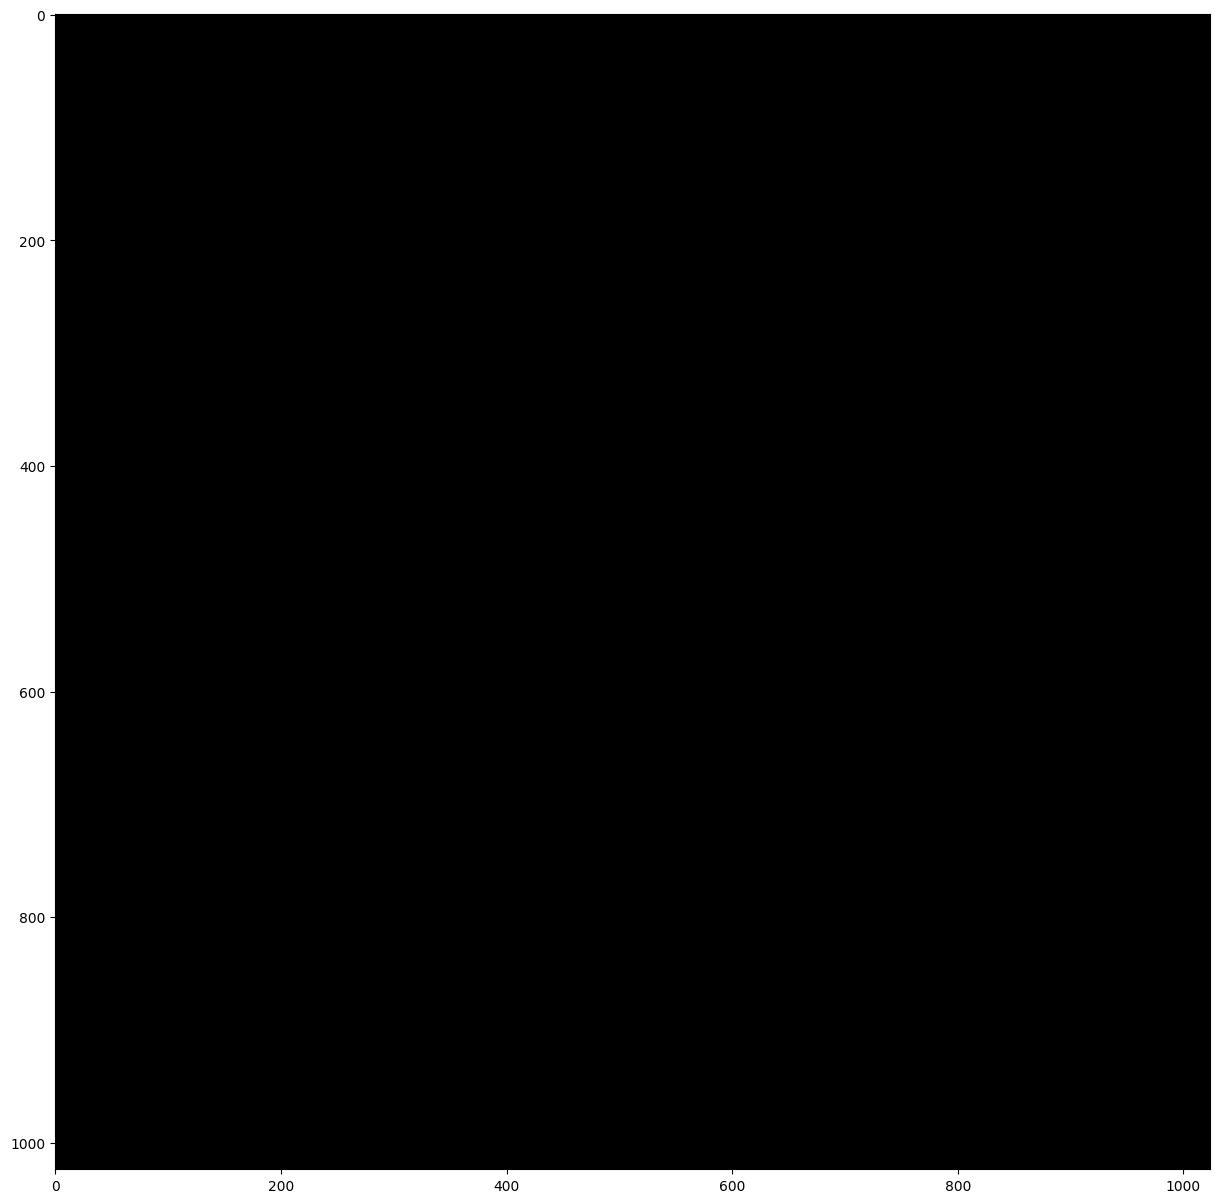

In [10]:
# display bounding box by using position file x_min = x-h, x_max = x+h, y_min = y-w, y_max = y+w
def plot_bounding_box(items_list, img):
    """
    items_list: list of items in position file
    img: image
    """
    plt.rcParams['figure.figsize'] = [15, 15]
    for item in items_list:
        x = float(item[1])
        y = float(item[2])
        w = float(item[3])
        h = float(item[4])
        x_min = x - w
        x_max = x + w
        y_min = y - h
        y_max = y + h
        plt.plot([x_min, x_max], [y_min, y_min], c='r')
        plt.plot([x_min, x_max], [y_max, y_max], c='r')
        plt.plot([x_min, x_min], [y_min, y_max], c='r')
        plt.plot([x_max, x_max], [y_min, y_max], c='r')
    plt.imshow(img)
    plt.show()

plot_bounding_box(items_list, img)

# do it with loop

In [11]:
def convert(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    x = (box[0] + box[1])/2.0
    y = (box[2] + box[3])/2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    # return x,y,w,h with float 4 digits
    return (round(x, 4), round(y, 4), round(w, 4), round(h, 4))

w= int(img.shape[0])
h= int(img.shape[1])

# calculate xmin xmax ymin ymax
# xmin xmax is 2884.1311 1180.0615 3084.1311 1380.0615
xmin = 2884.1311
xmax = 3084.1311
ymin = 1180.0615
ymax = 1380.0615

print(xmin, xmax, ymin, ymax) #define your x,y coordinates
b = (xmin, xmax, ymin, ymax)
bb = convert((w,h), b)
print(bb)

2884.1311 3084.1311 1180.0615 1380.0615
(2.9142, 1.2501, 0.1953, 0.1953)


In [12]:
# convert the positon from pixel to YOLO format following the format file: labels x_center y_center width height
# calculate x_min = x-w, x_max = x+w, y_min = y-h, y_max = y+h
def convert_position_to_YOLO_format(items_list, img, name_to_write , path):
    """
    items_list: list of items in position file
    img: image
    """
    height, width, _ = img.shape
    for item in items_list:
        x = float(item[1])
        y = float(item[2])
        w = float(item[3])
        h = float(item[4])
        x_min = (x - w) 
        x_max = (x + w) 
        y_min = (y - h) 
        y_max = (y + h) 
        new_pos = convert((width, height), (x_min, x_max, y_min, y_max))
        # open file to write in Yolo_labels_global_F814W_InvertY by file_
        with open(path + name_to_write, "a") as f:
            if item[0] == "Cluster":
                # print("0", new_pos[0], new_pos[1], new_pos[2], new_pos[3])
                f.write("0" + " " + str(new_pos[0]) + " " + str(new_pos[1]) + " " + str(new_pos[2]) + " " + str(new_pos[3]) + "\n")
            else:
                # print("1", new_pos[0], new_pos[1], new_pos[2], new_pos[3])
                # f.write("1" + " " + str(new_pos[0]) + " " + str(new_pos[1]) + " " + str(new_pos[2]) + " " + str(new_pos[3]) + "\n")
                
                # don't write anything if the item is not a cluster
                pass
        f.close()
                
# convert_position_to_YOLO_format(items_list, img)


In [13]:
# loop for saving all files as a new file in path ../data/jpg/Yolo_labels_global_F814W_InvertY/
for index in range(len(files_name)):
    img_name = files_name[index].split("\\")[-1].split(".")[0]
    txt_name = file_[index].split("\\")[-1].split(".")[0]
    if img_name == txt_name:
        img = plt.imread(files_name[index])
        with open(file_[index], "r") as f:
            items_list = f.readlines()
            items_list = [item.strip().split(" ") for item in items_list]
            print("Processing file: ", txt_name)
            convert_position_to_YOLO_format(items_list, img, txt_name + ".txt", "../../data/data_augmentation/labels/")
    else:
        print("File name is not match, Example: ", img_name, txt_name)

Processing file:  hst_10190_12_acs_wfc_f814w_j90o12_drc_1
Processing file:  hst_10190_12_acs_wfc_f814w_j90o12_drc_10
Processing file:  hst_10190_12_acs_wfc_f814w_j90o12_drc_11
Processing file:  hst_10190_12_acs_wfc_f814w_j90o12_drc_12
Processing file:  hst_10190_12_acs_wfc_f814w_j90o12_drc_13
Processing file:  hst_10190_12_acs_wfc_f814w_j90o12_drc_14
Processing file:  hst_10190_12_acs_wfc_f814w_j90o12_drc_15
Processing file:  hst_10190_12_acs_wfc_f814w_j90o12_drc_16
Processing file:  hst_10190_12_acs_wfc_f814w_j90o12_drc_17
Processing file:  hst_10190_12_acs_wfc_f814w_j90o12_drc_18
Processing file:  hst_10190_12_acs_wfc_f814w_j90o12_drc_19
Processing file:  hst_10190_12_acs_wfc_f814w_j90o12_drc_2
Processing file:  hst_10190_12_acs_wfc_f814w_j90o12_drc_20
Processing file:  hst_10190_12_acs_wfc_f814w_j90o12_drc_21
Processing file:  hst_10190_12_acs_wfc_f814w_j90o12_drc_22
Processing file:  hst_10190_12_acs_wfc_f814w_j90o12_drc_23
Processing file:  hst_10190_12_acs_wfc_f814w_j90o12_drc_24